In [1]:
import yfinance as yf
from pandas_datareader import data as pdr
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
start = dt.datetime(2011,11,20)
end = dt.datetime.now()
#my_stocks= ['CELR-USD', 'AVAX-USD', 'XRP-USD', 'DOGE-USD', 'THETA-USD']
my_stocks= ['AMZN', 'TSLA','FF', 'DB', 'BB','VWAGY', 'TTM', 'F', 'NSANY', 'MZDAY','WMT']
df={}
for stock in my_stocks:
   df[stock]=pdr.get_data_yahoo(stock,start,end)#reading 11 data stocks from yahoo finance 
   df[stock]= df[stock][['Open', 'Close']]#Selecting Open & Close Cols
   df[stock]= df[stock].rename(columns={'Open': f'Open_{stock}', 'Close': f'Close_{stock}'})#Renaming selected cols

#checking data availibilty through the 10 last years for each stock
for stock in my_stocks:
    print(f'Start Date of {stock} stock = {df[stock].index[0]}')

Start Date of AMZN stock = 2011-11-21 00:00:00
Start Date of TSLA stock = 2011-11-21 00:00:00
Start Date of FF stock = 2011-11-21 00:00:00
Start Date of DB stock = 2011-11-21 00:00:00
Start Date of BB stock = 2011-11-21 00:00:00
Start Date of VWAGY stock = 2011-11-21 00:00:00
Start Date of TTM stock = 2011-11-21 00:00:00
Start Date of F stock = 2011-11-21 00:00:00
Start Date of NSANY stock = 2011-11-21 00:00:00
Start Date of MZDAY stock = 2011-11-21 00:00:00
Start Date of WMT stock = 2011-11-21 00:00:00


In [3]:
#merging all data stocks on one table 
first_stock_name=next(iter(df))
merged_df = pd.DataFrame(index=df[first_stock_name].index)
for stock in my_stocks:
    merged_df=merged_df.merge(df[stock], on ='Date', how='inner')
merged_df

,Open_AMZN,Close_AMZN,Open_TSLA,Close_TSLA,Open_FF,Close_FF,Open_DB,Close_DB,Open_BB,Close_BB,...,Open_TTM,Close_TTM,Open_F,Close_F,Open_NSANY,Close_NSANY,Open_MZDAY,Close_MZDAY,Open_WMT,Close_WMT
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-21,193.289993,189.250000,6.488000,6.352000,11.61,11.19,33.549618,33.110687,17.540001,17.360001,...,15.620000,15.410000,9.990000,10.050000,17.070000,16.680000,4.6875,4.6875,56.930000,56.660000
2011-11-22,186.949997,192.339996,6.352000,6.414000,11.24,11.14,32.175571,32.051525,17.180000,16.870001,...,16.129999,15.940000,10.020000,10.090000,17.090000,17.000000,4.6875,4.6875,56.560001,56.849998
2011-11-23,193.059998,188.990005,6.352000,6.290000,11.08,10.37,32.099236,30.973282,16.709999,16.200001,...,15.780000,15.530000,9.970000,9.830000,16.799999,16.760000,4.6875,4.6875,56.650002,56.639999
2011-11-25,190.410004,182.399994,6.310000,6.332000,10.52,10.22,30.811069,30.858780,16.250000,16.000000,...,16.000000,16.040001,9.810000,9.750000,16.790001,16.740000,4.6875,4.6875,56.689999,56.889999
2011-11-28,191.649994,194.149994,6.400000,6.512000,10.59,10.61,33.959923,33.568703,16.440001,16.480000,...,17.250000,17.040001,10.150000,10.000000,17.500000,17.540001,4.6875,4.6875,57.529999,57.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-15,3537.000000,3545.679932,1017.630005,1013.390015,8.89,8.98,12.810000,12.720000,10.800000,10.820000,...,33.580002,33.570000,19.459999,19.860001,11.400000,11.340000,4.7900,4.7600,148.149994,146.910004
2021-11-16,3539.000000,3540.699951,1003.309998,1054.729980,9.03,8.81,12.800000,12.710000,10.740000,11.220000,...,34.490002,34.660000,19.900000,19.790001,11.310000,11.160000,4.7700,4.6600,145.100006,143.169998
2021-11-17,3564.719971,3549.000000,1063.510010,1089.010010,8.68,8.55,12.920000,12.960000,11.140000,10.960000,...,35.099998,34.939999,19.740000,19.959999,10.940000,10.900000,4.4800,4.5900,143.160004,141.940002


In [4]:
#Slice off the first three (3) years of daily price data.
three_years=merged_df.loc[:'2013-11-20']
Three_years= three_years.copy()
#Retain the Close Prices and convert them into daily return values 
for stock in my_stocks:
    Three_years[f'Return_{stock}']= Three_years[f'Close_{stock}'].pct_change()
Three_years=Three_years.loc[:,Three_years.columns.str.startswith('Return_')]
Three_years=Three_years.dropna()
Three_years

,Return_AMZN,Return_TSLA,Return_FF,Return_DB,Return_BB,Return_VWAGY,Return_TTM,Return_F,Return_NSANY,Return_MZDAY,Return_WMT
Date,,,,,,,,,,,
2011-11-22,0.016328,0.009761,-0.004468,-0.031989,-0.028226,-0.009986,0.034393,0.003980,0.019185,0.000000,0.003353
2011-11-23,-0.017417,-0.019333,-0.069120,-0.033641,-0.039715,-0.060870,-0.025721,-0.025768,-0.014118,0.000000,-0.003694
2011-11-25,-0.034870,0.006677,-0.014465,-0.003697,-0.012346,-0.015185,0.032840,-0.008138,-0.001193,0.000000,0.004414
2011-11-28,0.064419,0.028427,0.038160,0.087817,0.030000,0.088755,0.062344,0.025641,0.047790,0.000000,0.006328
2011-11-29,-0.029668,-0.024877,-0.026390,0.010233,0.054005,-0.023834,-0.018193,-0.001000,0.003991,0.000000,0.016070
...,...,...,...,...,...,...,...,...,...,...,...
2013-11-14,0.031385,-0.007931,0.013764,-0.010365,-0.006135,0.002234,0.057971,-0.000585,0.008161,0.004006,0.002281
2013-11-15,0.004818,-0.015625,-0.005903,-0.000655,-0.007716,0.013782,-0.002230,-0.001170,-0.000540,0.008867,0.001770
2013-11-18,-0.008099,-0.102399,0.013658,0.000873,-0.040435,0.003599,0.005109,-0.005272,-0.004860,-0.003296,0.000000


In [5]:
no_of_portfolios = 10000
matrix_of_return_values = np.asmatrix(Three_years)
matrix_of_return_values=matrix_of_return_values.T
no_of_asset_classes= matrix_of_return_values.shape[0]
matrix_of_return_values.shape

(11, 502)

In [6]:
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [7]:
def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights) # to make the sum of weights = 1
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights    
asset_weights=get_random_asset_weights(no_of_asset_classes)
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means       #asset_means.sum()/no_of_asset_classes
    portfolio_mean = portfolio_mean.item() #to convert its value type from matrix from float 
    portfolio_standard_deviation =np.sqrt(asset_weights * asset_covariances * asset_weights.T)  #abs(sqrt(portfolio_mean-(portfolio_mean**2)))
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean /portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
get_portfolio_statistics(asset_weights,matrix_of_return_values)  
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    PM,PSD,PSR=get_portfolio_statistics(random_asset_weights,matrix_of_return_values)
    portfolio_means.append(PM)
    portfolio_standard_deviations.append(PSD)
    portfolio_sharpe_ratios.append(PSR)
index=  portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print("Weights of the best portofoilo=", collection_of_random_asset_weights[index])

Weights of the best portofoilo= [[0.11478321 0.17848682 0.04536827 0.027567   0.00428994 0.00974564
  0.04264136 0.20922781 0.02704597 0.11278969 0.22805429]]


In [8]:
Best_portofoilo= pd.DataFrame(collection_of_random_asset_weights[index], columns=my_stocks, index=[Three_years.last_valid_index()])
print("Dollar amounts:")
Best_portofoilo


Dollar amounts:


,AMZN,TSLA,FF,DB,BB,VWAGY,TTM,F,NSANY,MZDAY,WMT
2013-11-20,0.114783,0.178487,0.045368,0.027567,0.00429,0.009746,0.042641,0.209228,0.027046,0.11279,0.228054


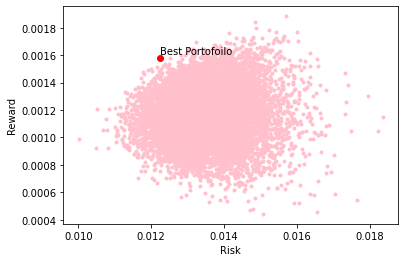

In [9]:
x = np.linspace(0, max(portfolio_standard_deviations),no_of_portfolios)
y = portfolio_sharpe_ratios[index] * x
plt.xlabel("Risk")
plt.ylabel("Reward")
plt.plot(portfolio_standard_deviations,portfolio_means , 'o', markersize = 3, color = 'pink')
plt.annotate("Best Portofoilo", (portfolio_standard_deviations[index],portfolio_means[index]), textcoords="offset points",xytext=(0,4), c="black")
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color='red', marker='o' )
plt.show() 

In [10]:
#Q/Give a complete conceptual description of the meaning of the Sharpe ratio 
#as it relates to the theory of portfolio optimization.
#Why do portfolio managers seek to maximize this measure???
print('''Q/ Give a complete conceptual description of the meaning of the Sharpe ratio  as it relates to the theory of portfolio 
optimization. Why do portfolio managers seek to maximize this measure???\n ''')

print('''A/ MAXIMISING SHARP RATIO HELPS PORTOFOILO MANAGERS TO SELECT THE BEST PORTOFOILOOF ASSETS THAT HAS THE BEST PROBABILITY TO
GENERATE THE HIGHEST PROFIT AND MINUMUM RISK AMONG OTHERS''')

Q/ Give a complete conceptual description of the meaning of the Sharpe ratio  as it relates to the theory of portfolio 
optimization. Why do portfolio managers seek to maximize this measure???
 
A/ MAXIMISING SHARP RATIO HELPS PORTOFOILO MANAGERS TO SELECT THE BEST PORTOFOILOOF ASSETS THAT HAS THE BEST PROBABILITY TO
GENERATE THE HIGHEST PROFIT AND MINUMUM RISK AMONG OTHERS


In [11]:
capital= 10000
capital_allocation= capital*Best_portofoilo
capital_allocation.index.name='Date'
print('Disributon of capital on each asset')
capital_allocation


Disributon of capital on each asset


,AMZN,TSLA,FF,DB,BB,VWAGY,TTM,F,NSANY,MZDAY,WMT
Date,,,,,,,,,,,
2013-11-20,1147.832053,1784.868193,453.682726,275.669959,42.899411,97.456435,426.413639,2092.278121,270.45965,1127.896942,2280.542871


In [12]:
no_of_shares_Open= capital_allocation/merged_df[[f'Open_{stock}' for stock in my_stocks]].loc[capital_allocation.index[0]].values
no_of_shares_Close= capital_allocation/merged_df[[f'Close_{stock}' for stock in my_stocks]].loc[capital_allocation.index[0]].values
no_of_shares=no_of_shares_Open.merge(no_of_shares_Close, on='Date')
for stock in my_stocks:
    no_of_shares=no_of_shares.rename(columns={f'{stock}_x': f'Open_{stock}', f'{stock}_y':f'Close_{stock}'}) #renaming cols
print("Share amounts per Fund Unit")
no_of_shares_Close

Share amounts per Fund Unit


,AMZN,TSLA,FF,DB,BB,VWAGY,TTM,F,NSANY,MZDAY,WMT
Date,,,,,,,,,,,
2013-11-20,3.165822,73.687895,28.161559,6.395885,7.055824,3.899817,14.008332,123.657099,14.643187,99.615537,28.904218


In [13]:
seven_years= merged_df.loc[no_of_shares.index[0]:]
Open=[]
Close=[]
for i in range(seven_years.shape[0]):
    Open.append(0)
    Close.append(0)
    for stock in my_stocks:
        Open[i]+=seven_years[f'Open_{stock}'].iloc[i]*no_of_shares[f'Open_{stock}'].iloc[0]
        Close[i]+=seven_years[f'Close_{stock}'].iloc[i]*no_of_shares[f'Open_{stock}'].iloc[0]

In [14]:
Seven_years= seven_years.copy()
Seven_years['Open']= Open
Seven_years['Close']= Close
Seven_years=Seven_years[['Open','Close']]
Seven_years

,Open,Close
Date,,
2013-11-20,10000.000000,9873.363190
2013-11-21,9910.138677,9938.056549
2013-11-22,9944.888893,9973.770153
2013-11-25,10080.670711,10032.503544
2013-11-26,10024.403777,10041.066851
...,...,...
2021-11-15,91376.026028,91113.016357
2021-11-16,90347.266751,93907.373051
2021-11-17,94578.554393,96332.189139


In [15]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=True)
absolute_return = (Seven_years.Close.iloc[-1]-Seven_years.Open.iloc[0])/Seven_years.Open.iloc[0]
CAGR = ((Seven_years.Close.iloc[-1]/Seven_years.Open.iloc[0])**(252/len(Seven_years)))-1

# Calculate the IR (Sharpe without RF-rate) 
information_ratio = (Seven_years.Close.pct_change().mean()/Seven_years.Close.pct_change().std())*((252) **0.5)

#Plot the equity curve (hint: use 'close' returns and your initial capital value to generate an equity curve)

print(f'''Absolute Return= {absolute_return}
CAGR= {CAGR}
Information Ratio= {information_ratio}''')
##Visualizing the results 
((Seven_years.Close.pct_change().dropna()+1).cumprod()*capital).iplot()

Absolute Return= 9.00274744753081
CAGR= 0.3337577473432214
Information Ratio= 1.1119266288360254


In [16]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [17]:
short_time=3
long_time= 12

Seven_years['Close_short_Rolling_Avg']= Seven_years['Close'].rolling(window= short_time).mean()
Seven_years['Close_long_Rolling_Avg']= Seven_years['Close'].rolling(window= long_time).mean()
Seven_years['Close_short_Rolling_Sum']= Seven_years['Close'].rolling(window= long_time).sum()#added to increase model accuracy
Seven_years['Open_STD_short_Rolling']= Seven_years['Open'].rolling(window= short_time).std()#added to increase model accuracy
Seven_years['Open_STD_long_Rolling']= Seven_years['Open'].rolling(window= long_time).std() #added to increase model accuracy
Seven_years['Gain']= Seven_years['Close']- Seven_years['Open'].dropna()#added to increase model accuracy
Seven_years= Seven_years.dropna()
Seven_years['Window_diff']= Seven_years['Close_long_Rolling_Avg']- Seven_years['Close_short_Rolling_Avg']
Seven_years['Open_1_change']= Seven_years['Open'].shift()
Seven_years= Seven_years.dropna()
Seven_years

,Open,Close,Close_short_Rolling_Avg,Close_long_Rolling_Avg,Close_short_Rolling_Sum,Open_STD_short_Rolling,Open_STD_long_Rolling,Gain,Window_diff,Open_1_change
Date,,,,,,,,,,
2013-12-09,10206.142970,10230.117826,10212.665963,10150.989337,1.218119e+05,41.512995,141.430081,23.974856,-61.676626,10285.088638
2013-12-10,10220.045187,10248.055935,10226.761705,10176.822619,1.221219e+05,42.143289,120.363105,28.010749,-49.939086,10206.142970
2013-12-11,10233.726725,10119.210135,10199.127965,10188.942617,1.222673e+05,13.792025,96.481084,-114.516590,-10.185348,10220.045187
2013-12-12,10121.342239,10228.145203,10198.470425,10205.246089,1.224630e+05,61.318470,92.543865,106.802963,6.775665,10233.726725
2013-12-13,10282.092713,10266.499639,10204.618326,10224.032155,1.226884e+05,82.472477,75.592461,-15.593075,19.413829,10121.342239
...,...,...,...,...,...,...,...,...,...,...
2021-11-15,91376.026028,91113.016357,92653.647363,98798.448427,1.185581e+06,3025.009083,5238.651950,-263.009671,6144.801064,93321.661753
2021-11-16,90347.266751,93907.373051,92481.773992,98515.808974,1.182190e+06,1510.566651,5679.093184,3560.106300,6034.034982,91376.026028
2021-11-17,94578.554393,96332.189139,93784.192849,97876.683002,1.174520e+06,2206.744536,5766.691952,1753.634746,4092.490153,90347.266751


In [18]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
X= Seven_years.copy()
scaler = StandardScaler()
X = pd.DataFrame(
    scaler.fit_transform(X), 
    columns=X.columns,
    index=X.index)
y= np.where(X['Close'].shift(-1) >= X['Close'], 1, -1)
X

,Open,Close,Close_short_Rolling_Avg,Close_long_Rolling_Avg,Close_short_Rolling_Sum,Open_STD_short_Rolling,Open_STD_long_Rolling,Gain,Window_diff,Open_1_change
Date,,,,,,,,,,
2013-12-09,-0.599548,-0.597872,-0.598979,-0.602564,-0.602564,-0.494012,-0.479682,0.016984,0.100386,-0.595460
2013-12-10,-0.598839,-0.596959,-0.598259,-0.601222,-0.601222,-0.492955,-0.500078,0.023055,0.109530,-0.599498
2013-12-11,-0.598142,-0.603513,-0.599670,-0.600592,-0.600592,-0.540511,-0.523200,-0.191340,0.140501,-0.598787
2013-12-12,-0.603869,-0.597972,-0.599704,-0.599745,-0.599745,-0.460791,-0.527011,0.141577,0.153715,-0.598087
2013-12-13,-0.595677,-0.596021,-0.599390,-0.598769,-0.598769,-0.425307,-0.543423,-0.042536,0.163561,-0.603835
...,...,...,...,...,...,...,...,...,...,...
2021-11-15,3.537006,3.516482,3.612046,4.003198,4.003198,4.510476,4.455277,-0.414708,4.935665,3.651590
2021-11-16,3.484579,3.658625,3.603267,3.988513,3.988513,1.970164,4.881698,5.336155,4.849371,3.552077
2021-11-17,3.700212,3.781971,3.669794,3.955306,3.955306,3.137927,4.966508,2.618798,3.336772,3.499460


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.3)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression()
logistic= logistic.fit(X_train, y_train)
pd.DataFrame(zip(X, np.transpose(logistic.coef_)))

,0,1
0,Open,[-0.12457410274490537]
1,Close,[-0.13246329471858745]
2,Close_short_Rolling_Avg,[0.10911983462591027]
3,Close_long_Rolling_Avg,[0.08795050771958425]
4,Close_short_Rolling_Sum,[0.0879505077195809]
5,Open_STD_short_Rolling,[-0.061308409553045944]
6,Open_STD_long_Rolling,[-0.3193848199776288]
7,Gain,[-0.2400635241261293]
8,Window_diff,[-0.3455127463683256]
9,Open_1_change,[0.2220889619817811]


In [21]:
predictions= logistic.predict(X_test)
print(f"Model Accuracy = {logistic.score(X_test, y_test)*100:.2f}%")

Model Accuracy = 54.10%


In [22]:
print("Model Confusion Matric\n")
print(metrics.confusion_matrix(y_test, predictions),"\n-----------------------------------------------------")
print("Model Classification Report\n")
print(metrics.classification_report(y_test, predictions))

Model Confusion Matric

[[ 54 574]
 [ 70 705]] 
-----------------------------------------------------
Model Classification Report

              precision    recall  f1-score   support

          -1       0.44      0.09      0.14       628
           1       0.55      0.91      0.69       775

    accuracy                           0.54      1403
   macro avg       0.49      0.50      0.42      1403
weighted avg       0.50      0.54      0.44      1403



In [23]:
results=X_test.copy()
results['c2c_price']= X_test['Close'].shift(-1)- X_test['Close']
results['True_Label']= y_test
results['Predictions']= predictions
results['Daily_Return']= results['c2c_price']*results['Predictions']
results['Cumulative_Return']= results['Daily_Return'].cumsum()
results.dropna(inplace= True)
results

,Open,Close,Close_short_Rolling_Avg,Close_long_Rolling_Avg,Close_short_Rolling_Sum,Open_STD_short_Rolling,Open_STD_long_Rolling,Gain,Window_diff,Open_1_change,c2c_price,True_Label,Predictions,Daily_Return,Cumulative_Return
Date,,,,,,,,,,,,,,,
2013-12-24,-0.598122,-0.596906,-0.600381,-0.599757,-0.599757,-0.413671,-0.550932,0.003472,0.163856,-0.599314,0.029743,1,1,0.029743,0.029743
2015-10-08,-0.568078,-0.567163,-0.566429,-0.574690,-0.574690,-0.506322,-0.427408,-0.003819,0.021905,-0.565780,0.028477,-1,1,0.028477,0.058220
2014-09-29,-0.532847,-0.538686,-0.532511,-0.520675,-0.520675,-0.380744,-0.430232,-0.201633,0.314523,-0.529000,0.197267,-1,1,0.197267,0.255487
2019-02-28,-0.343907,-0.341419,-0.347284,-0.350511,-0.350511,-0.247421,-0.512897,0.054891,0.040982,-0.355873,0.025674,-1,1,0.025674,0.281161
2018-09-11,-0.324390,-0.315745,-0.321897,-0.299602,-0.299602,-0.306572,-0.324755,0.238020,0.417165,-0.322461,-0.084929,1,1,-0.084929,0.196233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-16,-0.578236,-0.573693,-0.574562,-0.568879,-0.568879,-0.394678,-0.406063,0.102907,0.233071,-0.573166,0.760148,-1,1,0.760148,194.092769
2020-06-03,0.188382,0.186455,0.189538,0.155141,0.155141,0.046169,-0.142469,-0.046737,-0.564549,0.193188,-0.810822,-1,1,-0.810822,193.281947
2016-02-26,-0.623952,-0.624367,-0.628811,-0.650552,-0.650552,-0.223257,-0.304326,-0.046201,-0.164185,-0.635997,0.109509,1,1,0.109509,193.391456


In [24]:
absolute_return = (results.Close.iloc[-1]-results.Open.iloc[0])/results.Open.iloc[0]
CAGR = ((results.Close.iloc[-1]/results.Open.iloc[0])**(252/len(results)))-1
information_ratio = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)

print(f'''Absolute Return= {absolute_return}
CAGR= {CAGR}
Information Ratio= {information_ratio}''')
((results.Close.pct_change().dropna()+1).cumprod()*capital).iplot() #fix it later


Absolute Return= -4.074264119166865
CAGR= nan
Information Ratio= -2.6290982511681316


<ipython-input-24-40b13f3153fc>:2: RuntimeWarning:

invalid value encountered in double_scalars

